# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [7]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

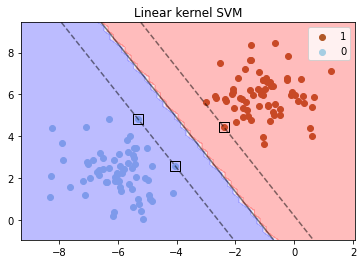

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

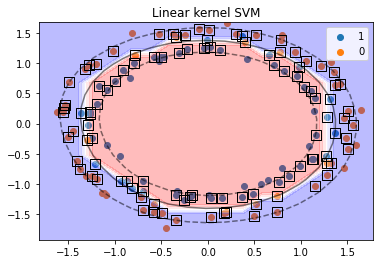

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.91      0.95        34

    accuracy                           0.95        66
   macro avg       0.96      0.96      0.95        66
weighted avg       0.96      0.95      0.95        66



In [9]:
from sklearn.preprocessing import StandardScaler

# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)

# normalize our data
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X = pd.DataFrame(X, columns=['x1', 'x2'])
X_std = pd.DataFrame(X_std, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.33, random_state=333)

#initialize model and create dataframe with coordinates of all support vectors
model = svm.SVC(kernel='rbf', gamma=0.5, random_state=123)
model.fit(X_train, Y_train)
support_Vectors = model.support_vectors_

#create plot
fig, ax = plt.subplots()

#plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
        label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
        label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 0.2, X_train.iloc[:, 0].max() + 0.2
x2_min, x2_max = X_train.iloc[:, 1].min() - 0.2, X_train.iloc[:, 1].max() + 0.2

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, which are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')
ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

# run model on test set and view results
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))


We can see that with a gamma of 0.5, and the RBF kernel, the SVM trains a great model, with high precision. We do have the concern that this model is greatly overfitting, since it is using 107 out of 134 datapoints as support vectors. The only thing that could change this however, is the gamme, which is given. We standardized the data and gained an even better prediction rate than with the unstandardized data.

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>


A linear kernel can only be used if the data is somewhat linearly seperable. That is, a distribution of datapoints where a straight line is able to seperate the two classes decently well. In this situation, it is clear that there exists no such line, thus the RBF kernel was used. In general, the RBF kernel is the best way to go if the data is non-linearly seperable.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

In the code below, we will compute and plot summary statistics for the original and standardized data.

               x1          x2
count  200.000000  200.000000
mean    -0.002313    0.003261
std      0.637979    0.646359
min     -1.033537   -1.107825
25%     -0.636129   -0.611061
50%      0.008177    0.011601
75%      0.609592    0.635150
max      1.046845    1.074295
                 x1            x2
count  2.000000e+02  2.000000e+02
mean  -2.442491e-17  2.664535e-17
std    1.002509e+00  1.002509e+00
min   -1.620447e+00 -1.723306e+00
25%   -9.959675e-01 -9.528197e-01
50%    1.648345e-02  1.293521e-02
75%    9.615367e-01  9.800669e-01
max    1.648628e+00  1.661186e+00


Text(0.5, 0.98, 'Data Distribution for Original and Standardized Data')

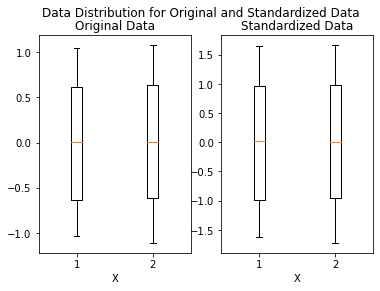

In [10]:
print(X.describe())
print(X_std.describe())

fig, axs = plt.subplots(1, 2)
#fig.tight_layout()
axs[0].boxplot(X)
axs[0].title.set_text("Original Data")
axs[0].set_xlabel("X")
axs[1].boxplot(X_std);
axs[1].title.set_text("Standardized Data")
axs[1].set_xlabel("X")
fig.suptitle("Data Distribution for Original and Standardized Data")



As we can see from the summary statistics, as well as from the boxplots, is that in the original data, X1 and X2 are quite similar in range as well as mean. Therefore, in this specific case, it might not be necessary to standardize. This same conclusion can be drawn from the boxplots. It is, however, wise to standardize data when working with the RBF kernel, since the RBF SVM depends on the euclidean distance between datapoints. This means that, when the ranges of the datapoints are very different, the exponent used in the RBF kernel grows aswell. This is something that is not desirable, therefore standardizing data for RBF SVM is always a good idea.

In a more general way, standardizing is always a good idea for any type of SVM. Since the hyperplane seperating the classes is influenced by the values of the datapoints, if the features are on different scales, the hyperplane might be influenced too much by the features with larger values, leading to suboptimal results. 





## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [11]:
from sklearn.metrics import precision_score

model = svm.SVC()

#define grid with step size 0.01
params = {"C": np.linspace(1e-3, 10, num=10),
          "gamma": np.linspace(1e-3, 10, num=10)}

#define search and fit grid
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring="f1")
grid.fit(X_train, Y_train)

print(grid.cv_results_["params"])
print(grid.cv_results_["mean_test_score"])

print(grid.score(X_test, Y_test))

y_pred = grid.predict(X_test)

# TODO Ik denk dat dit handmatig moet?
precision = precision_score(Y_test, y_pred)

print(precision)

print(classification_report(Y_test, y_pred))

[{'C': 0.001, 'gamma': 0.001}, {'C': 0.001, 'gamma': 1.1119999999999999}, {'C': 0.001, 'gamma': 2.223}, {'C': 0.001, 'gamma': 3.334}, {'C': 0.001, 'gamma': 4.445}, {'C': 0.001, 'gamma': 5.556}, {'C': 0.001, 'gamma': 6.667000000000001}, {'C': 0.001, 'gamma': 7.7780000000000005}, {'C': 0.001, 'gamma': 8.889}, {'C': 0.001, 'gamma': 10.0}, {'C': 1.1119999999999999, 'gamma': 0.001}, {'C': 1.1119999999999999, 'gamma': 1.1119999999999999}, {'C': 1.1119999999999999, 'gamma': 2.223}, {'C': 1.1119999999999999, 'gamma': 3.334}, {'C': 1.1119999999999999, 'gamma': 4.445}, {'C': 1.1119999999999999, 'gamma': 5.556}, {'C': 1.1119999999999999, 'gamma': 6.667000000000001}, {'C': 1.1119999999999999, 'gamma': 7.7780000000000005}, {'C': 1.1119999999999999, 'gamma': 8.889}, {'C': 1.1119999999999999, 'gamma': 10.0}, {'C': 2.223, 'gamma': 0.001}, {'C': 2.223, 'gamma': 1.1119999999999999}, {'C': 2.223, 'gamma': 2.223}, {'C': 2.223, 'gamma': 3.334}, {'C': 2.223, 'gamma': 4.445}, {'C': 2.223, 'gamma': 5.556}, {'

## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

In [4]:
import pandas as pd
import numpy as np

# Load data
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

# Prepare data for classification
X = gene_expression
y = drug_response
y.loc[y.iloc[:,0] > 0] = 0      # resistant
y.loc[y.iloc[:,0] < 0] = 1      # sensitive
y = y.values.ravel()            # turn column into 1D-array, since RF classifier prefers that

# Split dataset into 80% training, 20% validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Build the base model
rf_base_model = RandomForestClassifier(random_state=4, oob_score=True, bootstrap=True, criterion="entropy")

# Define parameter ranges for grid search
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 4)]
max_depth = [int(x) for x in np.linspace(start = 10, stop = X_train.shape[0]*0.8, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

param_grids = {"n_estimators" : n_estimators,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf}
n_cross_val = 5

# Perform grid search 
rf_grid = GridSearchCV(estimator = rf_base_model, param_grid = param_grids, return_train_score = True, cv = n_cross_val)
rf_grid.fit(X_train, y_train)

# Print best combination of hyerparameters
print(rf_grid.best_params_)

print(rf_grid.score(X_test, y_test))

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.6666666666666666


In [5]:
# Print best combination of hyerparameters
print(rf_grid.best_params_)

# Get model with that set of hyperparameters
rf_best_model = rf_grid.best_estimator_

# Predict classes for test set
y_pred = rf_best_model.predict(X_test)

# Print scores
print(rf_grid.score(X_test, y_test))

print(classification_report(y_test, y_pred))

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.6666666666666666
              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29        12
         1.0       0.64      1.00      0.78        18

    accuracy                           0.67        30
   macro avg       0.82      0.58      0.53        30
weighted avg       0.79      0.67      0.58        30



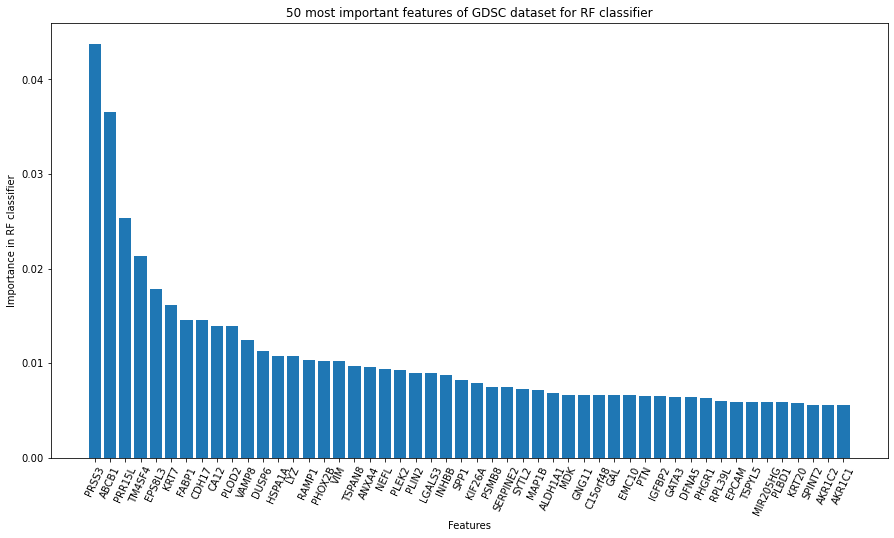

In [6]:
import matplotlib.pyplot as plt

# Extract feature importance from model
feature_importances = rf_best_model.feature_importances_

# Sort the feature importances and corresponding features
idx_sorted = np.argsort(-feature_importances)
top_features = X.columns[idx_sorted]
sorted_feature_importances = feature_importances[idx_sorted]

# Plot 50 most important features and their importance in a bar plot
plt.figure(figsize=(15,8))
plt.bar(top_features[:50], sorted_feature_importances[:50])
plt.xticks(rotation=65)
plt.title("50 most important features of GDSC dataset for RF classifier")
plt.xlabel("Features")
plt.ylabel("Importance in RF classifier")

plt.show()

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

STUDY: Random Forest Modelling of High-Dimensional Mixed-Type Data for Breast Cancer Classification (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7956671/ )

AUTHORS: Jelmar Quist, Lawson Taylor, Johan Staaf, Anita Grigoriadis

The biomedical data that was used in this study was multi-omics data. This means that more than one field of “-omics” was taken into account, for instance genomics and transcriptomics. 

In the article, multiple approaches of the random forest method (random forest (RF), regularized random forest (RRF) and conditional inference forest (CIF)) were investigated. The authors motivated that they had chosen random forests because they are able to be handle mixed-type data well, which is often the case when investigating multi-omics data. Besides, when using a random forest, it is possible to evaluate how important features are relative to one another. The authors addressed this advantage of having transparency around the selection of features when using random forests. They stated that extracting the relative importance of the features can be more difficult using other machine learning methods. 
